### Library Imports!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
sns.set_style("whitegrid")

%matplotlib inline

### Data Imports!

In [3]:
df_train = pd.read_csv('../Data/cleaned_train.csv')
df_test = pd.read_csv('../Data/cleaned_test.csv')

### Dropping Unnamed Columns in Both Datasets

In [4]:
df_train.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df_test.drop(columns='Unnamed: 0', inplace=True)

### Making a Correlation Heatmap Between All Variables and The Sale Price (Our Target)

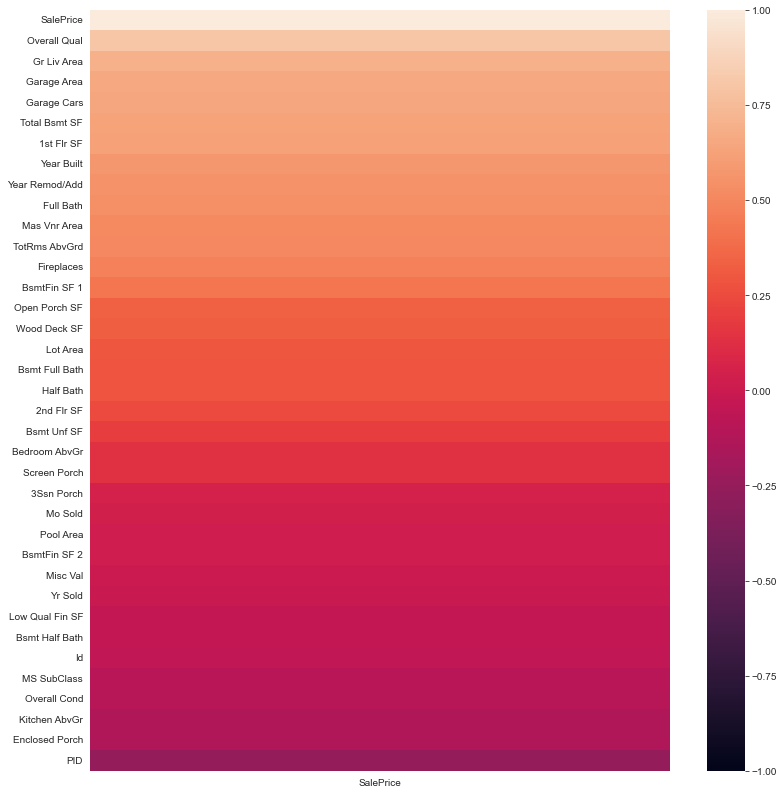

In [121]:
sns.set_style("whitegrid")
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), vmin = -1, vmax = 1);

### Seperating Numerical and Non-Numerical Columns

In [133]:
numerical_cols = df_train.dtypes[df_train.dtypes != 'object'].index


In [134]:
is_nulls = df_train.isnull().sum()
not_null_cols = is_nulls[is_nulls == 0].index


### Looking at Correlation Between Features and Sale Price
Trying to determine if I want to use this as a feature.

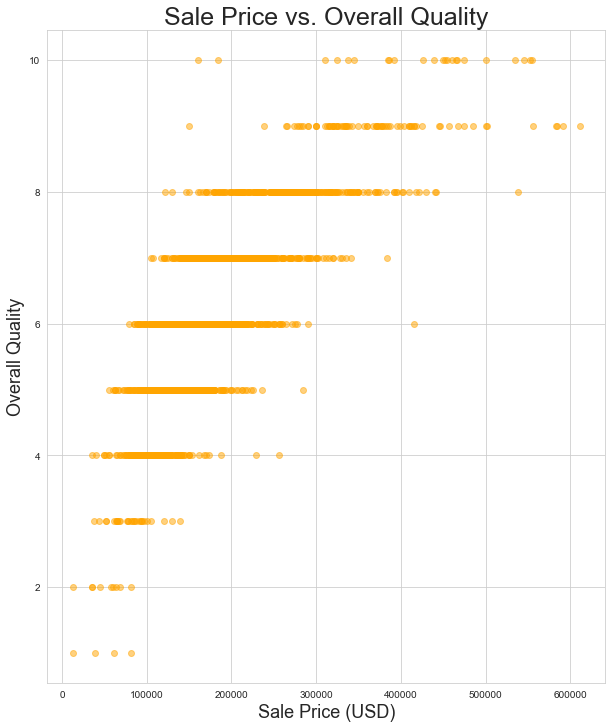

In [131]:
plt.scatter(x = df_train['SalePrice'], y = df_train['Overall Qual'], color = 'orange', alpha = .5)
plt.ylabel('Overall Quality', {'fontsize': 18})
plt.xlabel('Sale Price (USD)', {'fontsize': 18})
plt.title('Sale Price vs. Overall Quality', {'fontsize': 25})
plt.rcParams['figure.figsize'] = [10, 12];

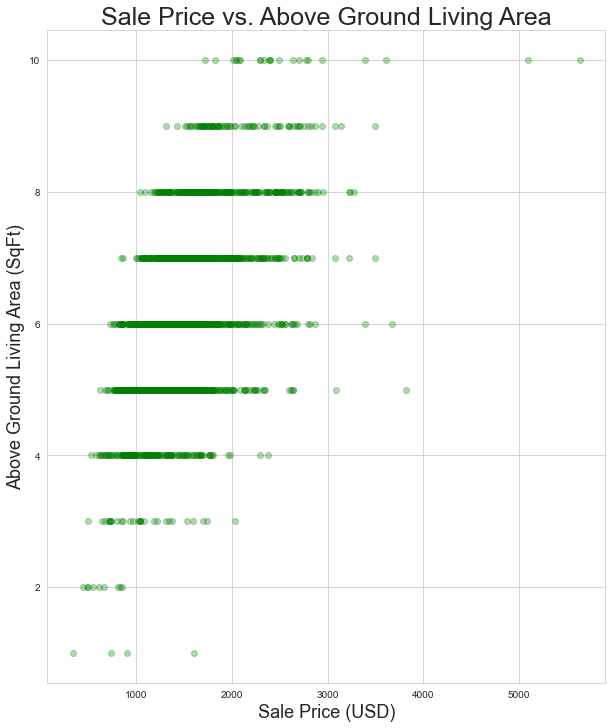

In [135]:
plt.scatter(x = df_train['Gr Liv Area'], y = df_train['Overall Qual'], color = 'green', alpha = .3)
plt.ylabel('Above Ground Living Area (SqFt)', {'fontsize': 18})
plt.xlabel('Sale Price (USD)', {'fontsize': 18})
plt.title('Sale Price vs. Above Ground Living Area', {'fontsize': 25})
plt.rcParams['figure.figsize'] = [10, 12];

### Looking at Distribution of Target Prior to Modeling

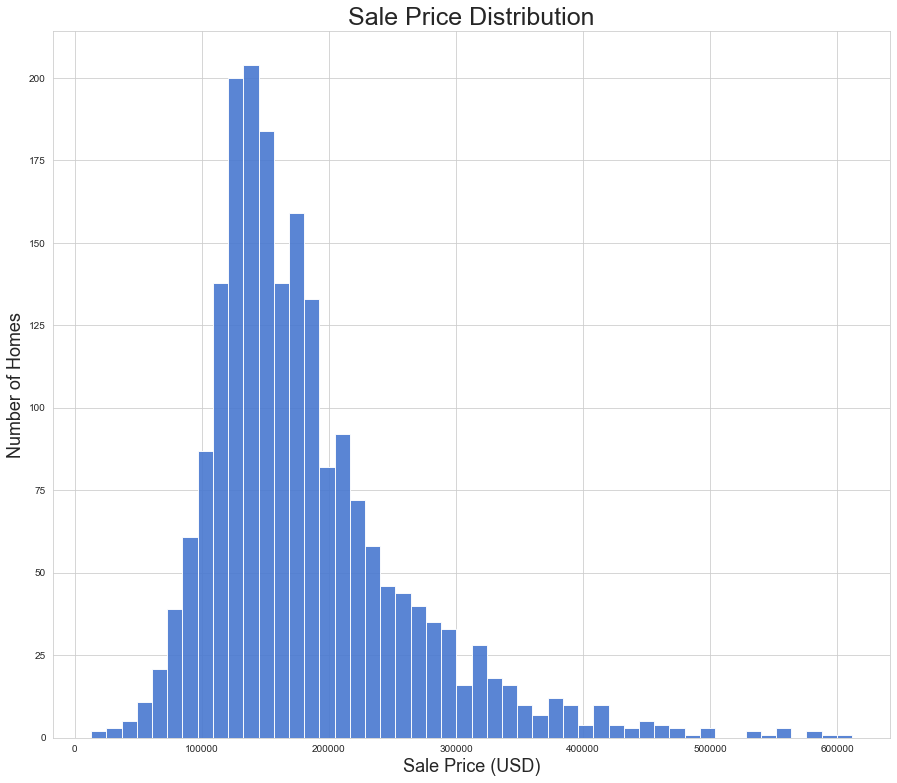

In [114]:
sns.set_style("whitegrid")
blue = sns.color_palette("muted", 1)

df_train['SalePrice'].hist(bins = 50, color = blue, alpha = .9)
plt.title('Sale Price Distribution', {'fontsize': 25})
plt.xlabel('Sale Price (USD)', {'fontsize': 18})
plt.ylabel('Number of Homes', {'fontsize': 18})
plt.rcParams['figure.figsize'] = [10, 8];



### Setting up X and y

In [13]:
X = df_train[['Gr Liv Area','Overall Qual']]

In [14]:
y = df_train['SalePrice']

### Instantiating Model

In [15]:
lr = LinearRegression()

In [16]:
X.shape

(2051, 2)

In [17]:
y.shape

(2051,)

In [18]:
lr.fit(X,y)

LinearRegression()

### Looking at Model Coefficients and Intercepts

In [19]:
lr.coef_ 

array([   56.82259957, 33169.16501899])

In [20]:
lr.intercept_

-106460.72550225205

### Making Predictions on Our Model

In [21]:
pred = lr.predict(X)
pred

array([176594.88937657, 246300.98591943, 119446.5873388 , ...,
       201255.89759019,  94403.05405839, 228231.39925599])

### Residuals

In [22]:
residuals = y - pred

In [23]:
sse = (residuals ** 2).sum()

In [24]:
mse = sse * 1/len(y)

In [25]:
mse

1709631680.011969

### Creating Predictions for the Null Model

In [26]:
null_sse = ((y - y.mean()) ** 2).sum()
null_mse = null_sse * 1 / len(y)

In [27]:
null_mse

6278872217.837828

### Train Test Split and Refit

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [139]:
lr.fit(X_train, y_train)

LinearRegression()

### Evaluation Metrics

In [140]:
cross_val_score(lr, X_train, y_train).mean()

0.7108316477991972

In [141]:
lr.score(X_train, y_train)

0.7194163570829553

In [142]:
lr.score(X_test, y_test)

0.7530182162122661

### Because all scores are close to one another, we can trust my model. Because my MSE is lower than the baseline model's MSE; my model is better at generalizing new data than the baseline model. 

### Making Predictions on the Test Data

In [36]:
pred2 = lr.predict(X_test)

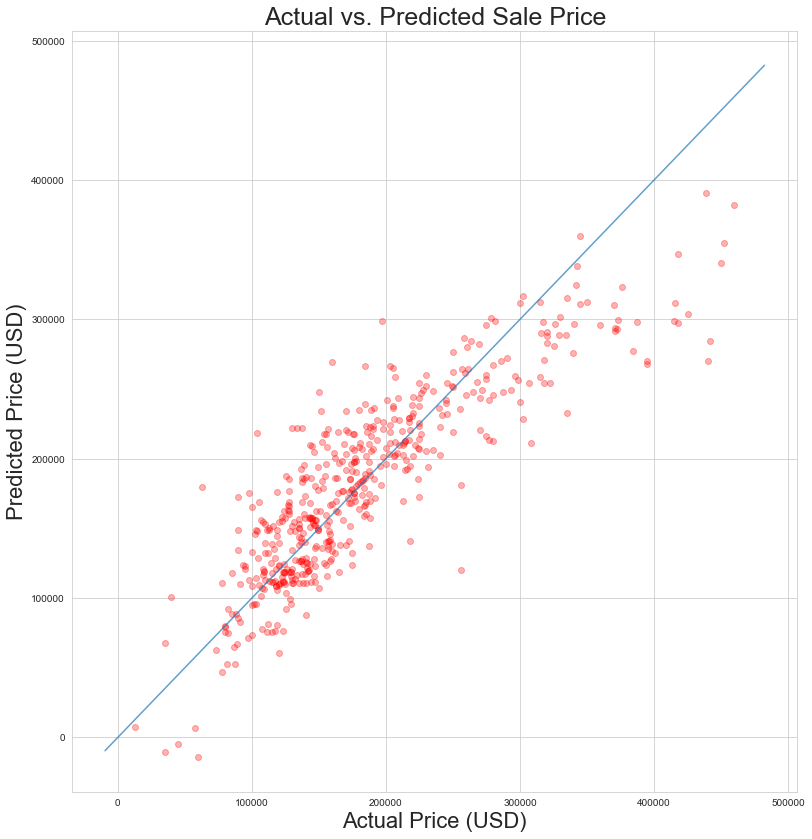

In [120]:
sns.set_style("whitegrid")
blue = sns.color_palette("muted", 1)

plt.scatter(x = y_test, y = pred2, color = 'red', alpha = .3)
xpoints = ypoints = plt.xlim() # code borrowed from katie on slack
plt.plot(xpoints, ypoints, alpha = .7)
plt.title('Actual vs. Predicted Sale Price', {'fontsize': 25})
plt.xlabel('Actual Price (USD)',{'fontsize': 22})
plt.ylabel('Predicted Price (USD)',{'fontsize': 22})
plt.rcParams['figure.figsize'] = [13, 14];

### Saving CSV

In [34]:
df_train = pd.to_csv('../Data/cleaned1_train.csv')
df_test = pd.to_csv('../Data/cleaned1_test.csv')

### Kaggle Submission

In [144]:
X_kaggle = df_test[['Gr Liv Area','Overall Qual']] 

In [145]:
sale_pred = lr.predict(X_kaggle)

In [44]:
df_test['SalePrice'] = sale_pred

In [46]:
lr_submission = df_test[['Id', 'SalePrice']]

In [48]:
lr_submission.set_index('Id', inplace = True)

In [50]:
lr_submission.to_csv('o_qual_lvng_area.csv')